In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
593989,593989,23004.26,0.152,703,20958.37,10.92,Female,Single,High School,Employed,Business,C3,1.0
593990,593990,35289.43,0.105,559,3257.24,14.62,Male,Single,Bachelor's,Employed,Debt consolidation,F5,1.0
593991,593991,47112.64,0.072,675,929.27,14.13,Female,Married,Bachelor's,Employed,Debt consolidation,C1,1.0
593992,593992,76748.44,0.067,740,16290.40,9.87,Male,Single,Bachelor's,Employed,Debt consolidation,B2,1.0


In [134]:
df.drop(['id'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  object 
 6   marital_status        593994 non-null  object 
 7   education_level       593994 non-null  object 
 8   employment_status     593994 non-null  object 
 9   loan_purpose          593994 non-null  object 
 10  grade_subgrade        593994 non-null  object 
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 54.4+ MB


In [135]:
df.isna().sum()

annual_income           0
debt_to_income_ratio    0
credit_score            0
loan_amount             0
interest_rate           0
gender                  0
marital_status          0
education_level         0
employment_status       0
loan_purpose            0
grade_subgrade          0
loan_paid_back          0
dtype: int64

In [136]:
df.duplicated().sum()

np.int64(0)

In [137]:
df.describe()

,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,loan_paid_back
count,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000,593994.000000
mean,48212.202976,0.120696,680.916009,15020.297629,12.356345,0.798820
std,26711.942078,0.068573,55.424956,6926.530568,2.008959,0.400883
min,6002.430000,0.011000,395.000000,500.090000,3.200000,0.000000
25%,27934.400000,0.072000,646.000000,10279.620000,10.990000,1.000000
50%,46557.680000,0.096000,682.000000,15000.220000,12.370000,1.000000
75%,60981.320000,0.156000,719.000000,18858.580000,13.680000,1.000000
max,393381.740000,0.627000,849.000000,48959.950000,20.990000,1.000000


In [138]:
df.columns

Index(['annual_income', 'debt_to_income_ratio', 'credit_score', 'loan_amount',
       'interest_rate', 'gender', 'marital_status', 'education_level',
       'employment_status', 'loan_purpose', 'grade_subgrade',
       'loan_paid_back'],
      dtype='object')

## Dataset Column Descriptions

### **annual_income**
The borrower's total yearly income. This is a key factor in determining loan eligibility and repayment capability.

### **debt_to_income_ratio**
The ratio of the borrower's total monthly debt payments to their monthly gross income. A lower ratio indicates better financial health and ability to take on additional debt.

### **credit_score**
A numerical representation of the borrower's creditworthiness based on their credit history. Higher scores indicate lower credit risk.

### **loan_amount**
The total amount of money requested or borrowed by the applicant.

### **interest_rate**
The percentage charged on the loan amount, representing the cost of borrowing.

### **gender**
The borrower's gender (categorical variable).

### **marital_status**
The borrower's marital status (e.g., single, married, divorced), which can impact financial stability and loan decisions.

### **education_level**
The highest level of education completed by the borrower, which may correlate with income potential and employment stability.

### **employment_status**
The borrower's current employment situation (e.g., employed, self-employed, unemployed).

### **loan_purpose**
The intended use of the loan (e.g., debt consolidation, home improvement, business, education).

### **grade_subgrade**
A risk classification assigned to the loan based on creditworthiness and other factors. This typically ranges from higher quality (lower risk) to lower quality (higher risk).

### **loan_paid_back** (Target Variable)
Indicates whether the borrower successfully repaid the loan. This is likely your target variable for prediction (binary: yes/no or 1/0).

<Axes: xlabel='loan_paid_back', ylabel='count'>

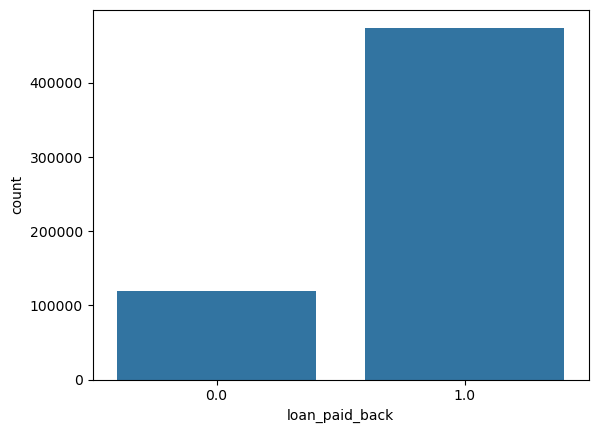

In [139]:
sns.countplot(x='loan_paid_back', data=df)

<Axes: xlabel='interest_rate', ylabel='loan_amount'>

c:\Users\sayan\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\sayan\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


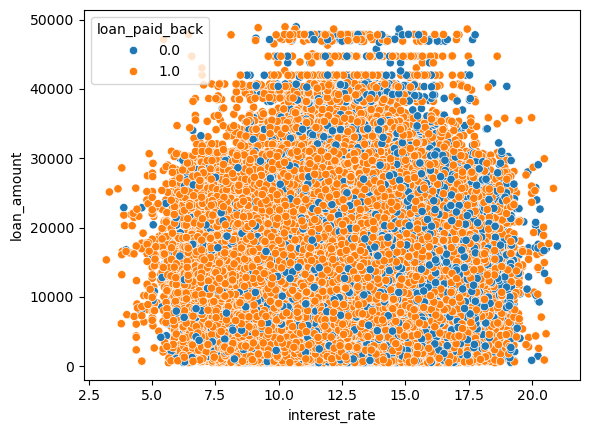

In [140]:
sns.scatterplot(x='interest_rate', y='loan_amount', hue='loan_paid_back', data=df)

<Axes: xlabel='annual_income', ylabel='loan_amount'>

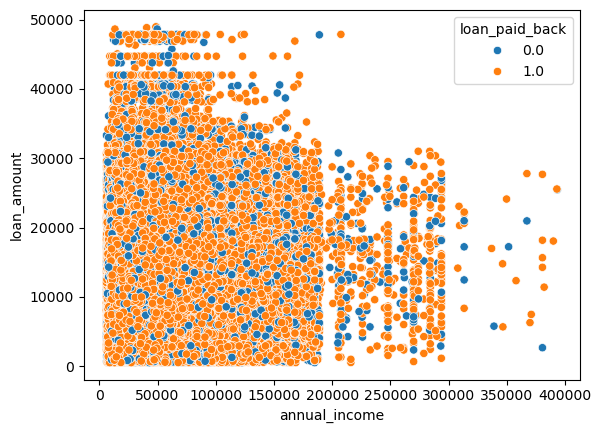

In [141]:
sns.scatterplot(x='annual_income', y='loan_amount', hue='loan_paid_back', data=df)

<Axes: xlabel='gender', ylabel='count'>

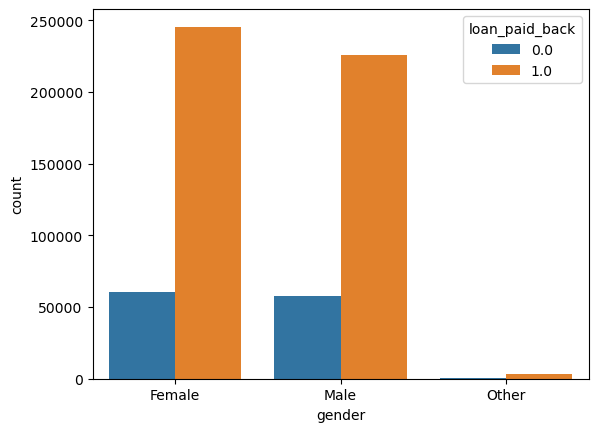

In [142]:
sns.countplot(x='gender', data=df, hue='loan_paid_back')

<Axes: xlabel='marital_status', ylabel='count'>

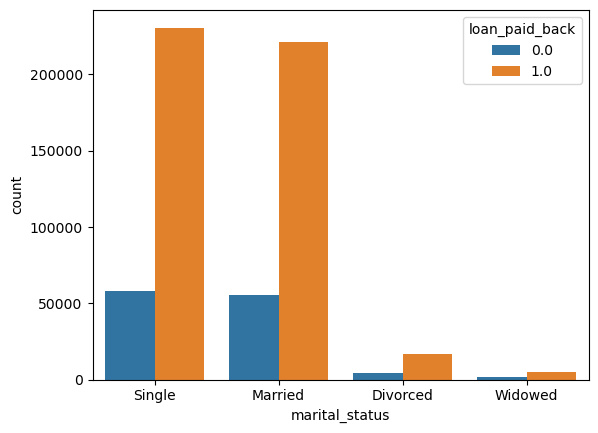

In [143]:
sns.countplot(x='marital_status', data=df, hue='loan_paid_back')

<Axes: xlabel='employment_status', ylabel='count'>

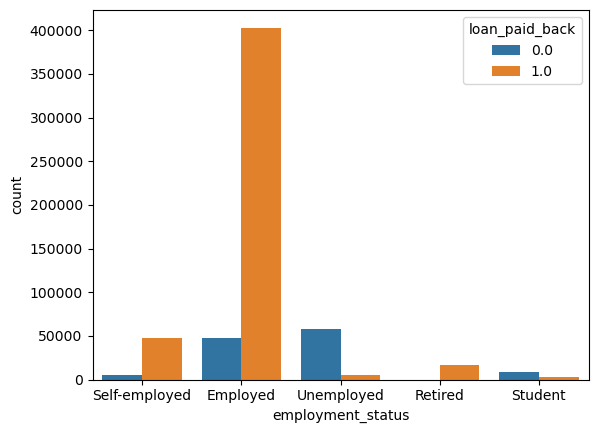

In [144]:
sns.countplot(x='employment_status', data=df, hue='loan_paid_back')

<Axes: xlabel='loan_purpose', ylabel='count'>

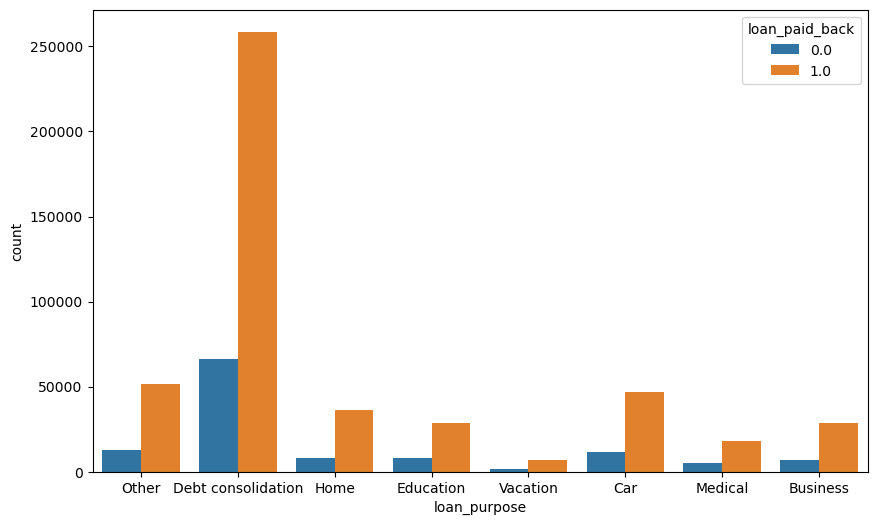

In [145]:
plt.figure(figsize=(10,6))
sns.countplot(x='loan_purpose', data=df, hue='loan_paid_back')

<Axes: xlabel='education_level', ylabel='count'>

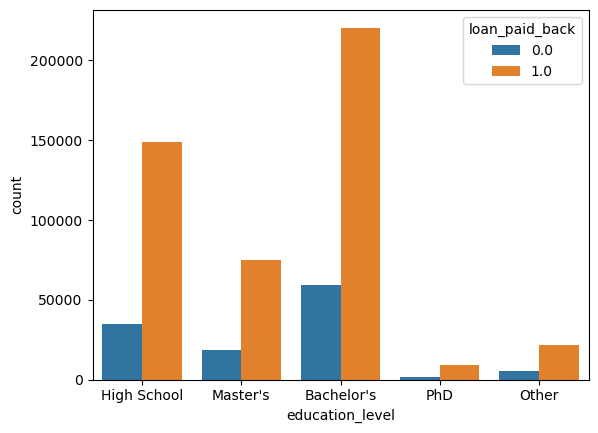

In [146]:
sns.countplot(x='education_level',data=df,hue='loan_paid_back')

<Axes: xlabel='grade_subgrade', ylabel='count'>

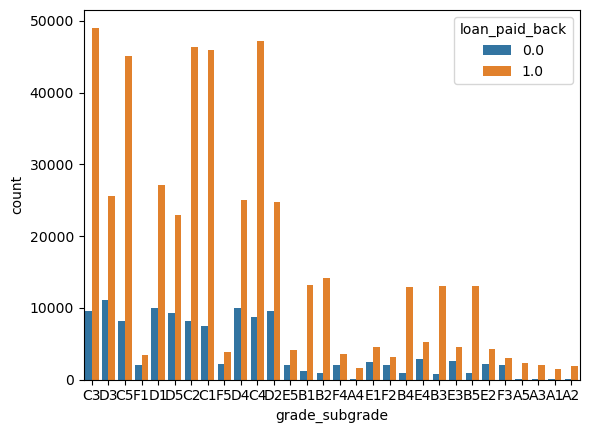

In [147]:
sns.countplot(x='grade_subgrade',data=df,hue='loan_paid_back')

<Axes: >

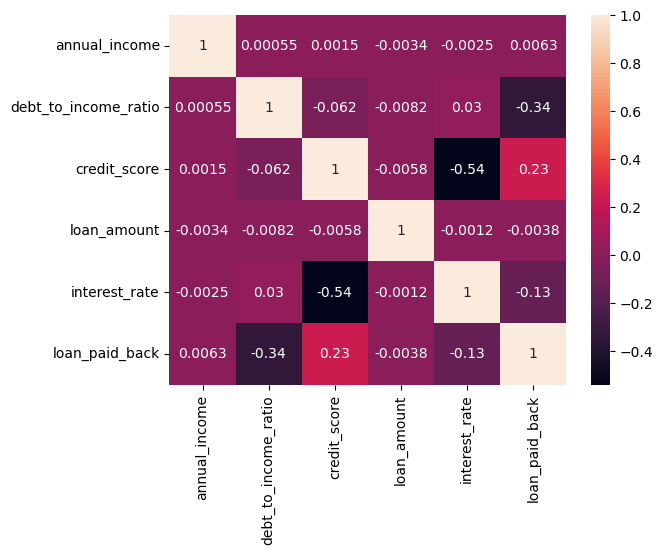

In [148]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [149]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(df['gender'], df['loan_paid_back'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 32.81277840786506
p-value: 7.495415297952627e-08


In [150]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(df['employment_status'], df['loan_paid_back'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 256259.8570646976
p-value: 0.0


In [151]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(df['marital_status'], df['loan_paid_back'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 4.122236955052154
p-value: 0.2485636772392249


In [152]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(df['education_level'], df['loan_paid_back'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 383.4337948215156
p-value: 1.0551863442893577e-81


In [153]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(df['loan_purpose'], df['loan_paid_back'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 391.32780192805905
p-value: 1.7258538194269543e-80


In [154]:
import pandas as pd
from scipy.stats import chi2_contingency

table = pd.crosstab(df['grade_subgrade'], df['loan_paid_back'])
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square:", chi2)
print("p-value:", p)


Chi-square: 30871.161938206686
p-value: 0.0


In [155]:
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['gender', 'marital_status', 'education_level', 'employment_status',
       'loan_purpose', 'grade_subgrade'],
      dtype='object')

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.transform(df_test[col])
df.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   annual_income         593994 non-null  float64
 1   debt_to_income_ratio  593994 non-null  float64
 2   credit_score          593994 non-null  int64  
 3   loan_amount           593994 non-null  float64
 4   interest_rate         593994 non-null  float64
 5   gender                593994 non-null  int64  
 6   marital_status        593994 non-null  int64  
 7   education_level       593994 non-null  int64  
 8   employment_status     593994 non-null  int64  
 9   loan_purpose          593994 non-null  int64  
 10  grade_subgrade        593994 non-null  int64  
 11  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(7)
memory usage: 54.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254569 entries, 0 to 254568
Data columns (total 12 columns):

In [157]:
x = df.drop(['loan_paid_back'], axis=1)
y = df['loan_paid_back']

In [158]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(
#     x, y,
#     test_size=0.2,
#     stratify=y,
#     random_state=42
# )
# y_test.value_counts(normalize=True)


In [159]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x,y)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [160]:
# y_pred = model.predict(x_test)
# from sklearn.metrics import accuracy_score
# accuracy = accuracy_score(y_test, y_pred)
# accuracy

In [161]:
import xgboost as xgb
xgb.__version__


'3.1.2'

In [162]:
xgb.config_context(verbosity=2)


In [163]:
neg, pos = y.value_counts()
scale_pos_weight_full = neg / pos
scale_pos_weight_full


3.970661087866109

In [164]:
import xgboost as xgb

final_model = xgb.XGBClassifier(
    tree_method="hist",
    device="cuda",

    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=5,
    gamma=0.1,

    subsample=0.8,
    colsample_bytree=0.8,

    scale_pos_weight=scale_pos_weight_full,
    objective="binary:logistic",
    eval_metric="auc",

    random_state=42
)

final_model.fit(x, y)


c:\Users\sayan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:05:33] WARNING: C:\miniconda3\conda-bld\xgboost-split_1764761400759\work\src\context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [165]:
# from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

# y_pred = xgb_model.predict(X_test)
# y_prob = xgb_model.predict_proba(X_test)[:, 1]


In [166]:
# print("Accuracy:", accuracy_score(y_test, y_pred))
# print("ROC-AUC:", roc_auc_score(y_test, y_prob))
# print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred))


In [167]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

auc_scores = []
for train_idx, val_idx in skf.split(x, y):
    X_tr, X_val = x.iloc[train_idx], x.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    model = xgb.XGBClassifier(
        tree_method="hist",
        device="cuda",
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        scale_pos_weight=scale_pos_weight_full,
        objective="binary:logistic",
        eval_metric="auc",
        random_state=42
    )

    model.fit(X_tr, y_tr)
    auc_scores.append(
        roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    )

print("Mean CV AUC:", np.mean(auc_scores))


c:\Users\sayan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:05:41] WARNING: C:\miniconda3\conda-bld\xgboost-split_1764761400759\work\src\context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\sayan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:05:45] WARNING: C:\miniconda3\conda-bld\xgboost-split_1764761400759\work\src\context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\sayan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:05:49] WARNING: C:\miniconda3\conda-bld\xgboost-split_1764761400759\work\src\context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\sayan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserW

Mean CV AUC: 0.9200164720550085


In [174]:
train_df = pd.read_csv("train.csv")
test_df  = pd.read_csv("test.csv")

y = train_df["loan_paid_back"]
train_df = train_df.drop(columns=["loan_paid_back"])

test_ids = test_df["id"]
train_df = train_df.drop(columns=["id",'marital_status'])
test_df  = test_df.drop(columns=["id",'marital_status'])

In [177]:
categorical_columns = train_df.select_dtypes(include=['object']).columns

In [178]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_columns:
    le = LabelEncoder()

    combined = pd.concat(
        [train_df[col], test_df[col]],
        axis=0
    )

    le.fit(combined)

    train_df[col] = le.transform(train_df[col])
    test_df[col]  = le.transform(test_df[col])


In [179]:
# Check row counts
print(train_df.shape)
print(test_df.shape)

# Check column order
assert list(train_df.columns) == list(test_df.columns)

# Check dtypes
print(train_df.dtypes)
print(test_df.dtypes)


(593994, 10)
(254569, 10)
annual_income           float64
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
interest_rate           float64
gender                    int64
education_level           int64
employment_status         int64
loan_purpose              int64
grade_subgrade            int64
dtype: object
annual_income           float64
debt_to_income_ratio    float64
credit_score              int64
loan_amount             float64
interest_rate           float64
gender                    int64
education_level           int64
employment_status         int64
loan_purpose              int64
grade_subgrade            int64
dtype: object


In [180]:
import xgboost as xgb

final_model = xgb.XGBClassifier(
    tree_method="hist",
    device="cuda",

    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    min_child_weight=5,
    gamma=0.1,

    subsample=0.8,
    colsample_bytree=0.8,

    scale_pos_weight=scale_pos_weight_full,
    objective="binary:logistic",
    eval_metric="auc",

    random_state=42
)

final_model.fit(train_df, y)

c:\Users\sayan\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [12:09:25] WARNING: C:\miniconda3\conda-bld\xgboost-split_1764761400759\work\src\context.cc:207: Device is changed from GPU to CPU as we couldn't find any available GPU on the system.
  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,'cuda'
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'auc'


In [181]:
test_probs = final_model.predict(test_df)


In [182]:
submission = pd.DataFrame({
    "id": test_ids,
    "loan_paid_back": test_probs
})

submission.to_csv("submission.csv", index=False)
